In [ ]:
# Analysis of the Pymaceuticals study

# 1.This study seems to be distributed evenly. You can tell from the bar graphs and pie charts
#   that the distribution of drugs is even across and there is about a 50/50 split between genders.
#   The only noticeable difference is that there were more measurements of Capomulin and Ramnicane.


# 2.Capomulin seems to be the best drug in this study. When we look at one mouse (B128) there is tumor volume drop over 
#  the period of the study. However, we need to continue to monitor because there is an increase in the last timepoint. 


# 3.The last observation in this study is that there is a correlation between weight and tumor volume for mice that were given 
#   Capomulin. We can determine this because it has a correlation coefficient of .88.
#   This is visualized in the correlation and regression image at the bottom of this notebook. 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [3]:
mouse_df = pd.read_csv('mouse_metadata.csv')
study_df=pd.read_csv('study_results.csv')
study_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
df=pd.merge(study_df, mouse_df, on=["Mouse ID","Mouse ID"], how='left')

In [5]:
df["Mouse ID"].value_counts()
clinical_df=df.fillna(0)

In [6]:
drug_regimen_group=clinical_df.groupby("Drug Regimen")
drug_mean=drug_regimen_group["Tumor Volume (mm3)"].mean()
drug_median=drug_regimen_group["Tumor Volume (mm3)"].median()
drug_var=drug_regimen_group["Tumor Volume (mm3)"].var()
drug_std=drug_regimen_group["Tumor Volume (mm3)"].std()
drug_sem=drug_regimen_group["Tumor Volume (mm3)"].sem()


drug_summary_stats_df = pd.DataFrame({
    "Mean":drug_mean,
    "Median":drug_median,
    "Variance":drug_var,
    "Standard Deviation":drug_std,
    "Standard Error of Mean":drug_sem,
})

drug_summary_stats_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
total_drugs=drug_regimen_group['Mouse ID'].count()
drug_regimen_group.count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


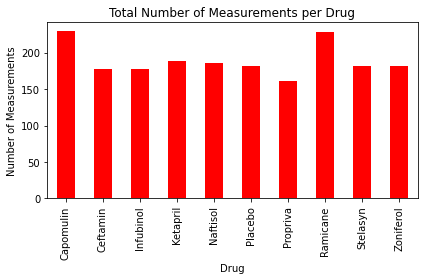

In [8]:
total_drugs.plot(kind="bar", facecolor="red")
plt.title("Total Number of Measurements per Drug")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug")
plt.tight_layout()

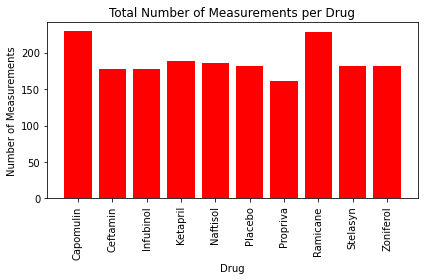

In [9]:
drugs = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
# tick_locations = [value+0.4 for value in drugs]

plt.bar(drugs,total_drugs,color='r',align="center")

plt.title("Total Number of Measurements per Drug")
plt.xticks(rotation="vertical")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug")
plt.tight_layout()

Text(0.5, 1.0, 'Gender Distribution')

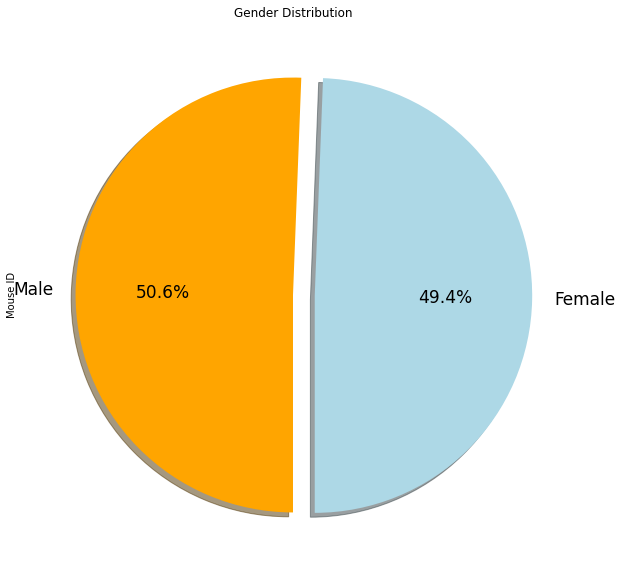

In [10]:
drug_sex_group=clinical_df.groupby("Sex")
total_sex=drug_sex_group['Mouse ID'].count()
explode = (0.1, 0)
colors=["lightblue","orange"]
gender_pie=total_sex.plot(kind="pie",figsize=(20,10),colors=colors,autopct='%1.1f%%',startangle=270, fontsize=17,shadow=True, explode=explode)

plt.title("Gender Distribution")
plt.savefig('correlation.png')

<IPython.core.display.Javascript object>


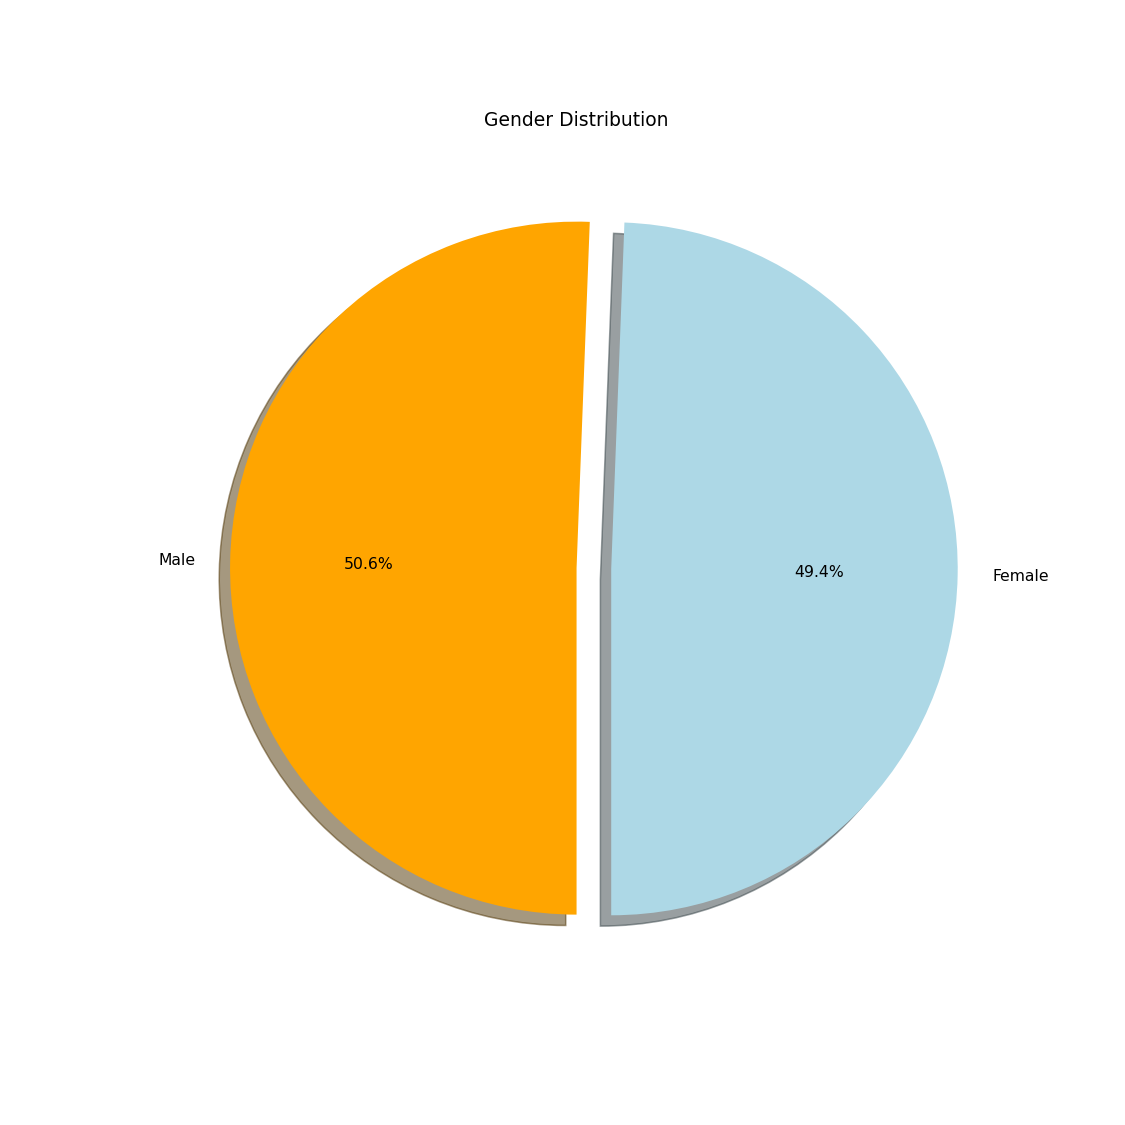

In [50]:
labels_pie=["Female","Male"]
colors_pie=["lightblue","orange"]
fig = plt.figure(figsize=(10,10))
explode = (0.1, 0,)
plt.pie(total_sex, explode=explode,labels=labels_pie,colors=colors_pie,shadow=True,startangle=270,autopct='%1.1f%%')

plt.title("Gender Distribution")
plt.savefig('gender_pie_matplotlib.png')

In [52]:
capo_df=clinical_df.loc[clinical_df["Drug Regimen"]=="Capomulin"]
ram_df=clinical_df.loc[clinical_df["Drug Regimen"]=="Ramicane"]
infu_df=clinical_df.loc[clinical_df["Drug Regimen"]=="Infubinol"]
ceft_df=clinical_df.loc[clinical_df["Drug Regimen"]=="Ceftamin"]


# greatest_ceft=ceft_df.groupby("Mouse ID").max()["Timepoint"]
# greatest_ceft

# greatest_capo=capo_df.groupby("Mouse ID").max()["Timepoint"]
# greatest_capo

# greatest_ram=ram_df.groupby("Mouse ID").max()["Timepoint"]
# greatest_ram

# greatest_infu=infu_df.groupby("Mouse ID").max()["Timepoint"]
# greatest_infu

In [54]:
merged_capo=pd.merge(greatest_capo,clinical_df, on=("Mouse ID","Timepoint"), how="left")
merged_capo

quartiles_capo = merged_capo["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_capo = quartiles_capo[0.25]
upperq_capo = quartiles_capo[0.75]
iqr_capo = upperq_capo-lowerq_capo
lower_bound_capo = lowerq_capo - (1.5*iqr_capo)
upper_bound_capo = upperq_capo + (1.5*iqr_capo)

print(f"The lower quartile of Capomulin tests is: {lowerq_capo}")
print(f"The upper quartile of Capomulin tests is: {upperq_capo}")
print(f"The interquartile range of Capomulin is: {iqr_capo}")
print(f"Values below {lower_bound_capo} could be outliers.")
print(f"Values above {upper_bound_capo} could be outliers.")

merged_capo.head()


The lower quartile of Capomulin tests is: 32.37735684
The upper quartile of Capomulin tests is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [55]:
merged_ceft=pd.merge(greatest_ceft,clinical_df, on=("Mouse ID","Timepoint"), how="left")

quartiles_ceft = merged_ceft["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[0.75]
iqr_ceft = upperq_ceft-lowerq_ceft
lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)

print(f"The lower quartile of Ceftamin tests is: {lowerq_ceft}")
print(f"The upper quartile of Ceftamin tests is: {upperq_ceft}")
print(f"The interquartile range of Ceftamin is: {iqr_ceft}")
print(f"Values below {lower_bound_ceft} could be outliers.")
print(f"Values above {upper_bound_ceft} could be outliers.")

merged_ceft.head()


The lower quartile of Ceftamin tests is: 48.72207785
The upper quartile of Ceftamin tests is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [56]:
merged_infu=pd.merge(greatest_infu,clinical_df, on=("Mouse ID","Timepoint"), how="left")


quartiles_infu = merged_infu["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_infu = quartiles_infu[0.25]
upperq_infu = quartiles_infu[0.75]
iqr_infu = upperq_infu-lowerq_infu
lower_bound_infu = lowerq_infu - (1.5*iqr_infu)
upper_bound_infu = upperq_infu + (1.5*iqr_infu)

print(f"The lower quartile of Infubinol tests is: {lowerq_infu}")
print(f"The upper quartile of Infubinol tests is: {upperq_infu}")
print(f"The interquartile range of Infubinol is: {iqr_infu}")
print(f"Values below {lower_bound_infu} could be outliers.")
print(f"Values above {upper_bound_infu} could be outliers.")

merged_infu.head()


The lower quartile of Infubinol tests is: 54.04860769
The upper quartile of Infubinol tests is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [57]:
merged_ram=pd.merge(greatest_ram,clinical_df, on=("Mouse ID","Timepoint"), how="left")
merged_ram

quartiles_ram = merged_ram["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram= quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

print(f"The lower quartile of Ramicane tests is: {lowerq_ram}")
print(f"The upper quartile of Ramicane tests is: {upperq_ram}")
print(f"The interquartile range of Ramicane is: {iqr_ram}")
print(f"Values below {lower_bound_ram} could be outliers.")

print(f"Values above {upper_bound_ram} could be outliers.")
merged_ram.head()

The lower quartile of Ramicane tests is: 31.56046955
The upper quartile of Ramicane tests is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


<IPython.core.display.Javascript object>


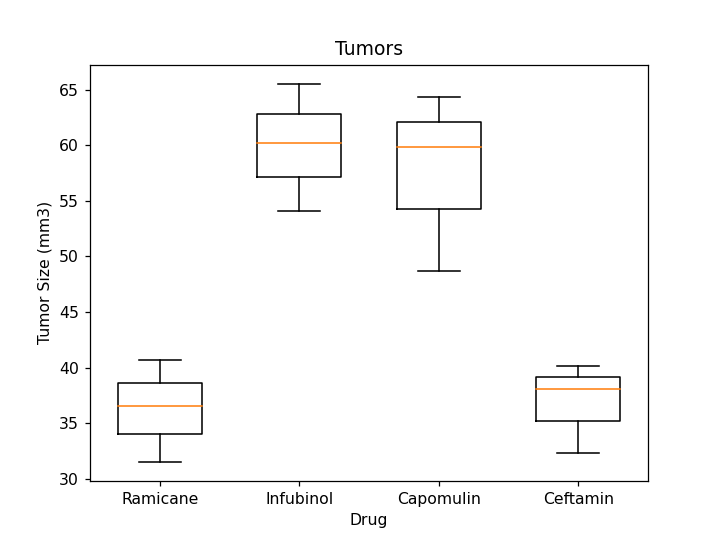

<IPython.core.display.Javascript object>


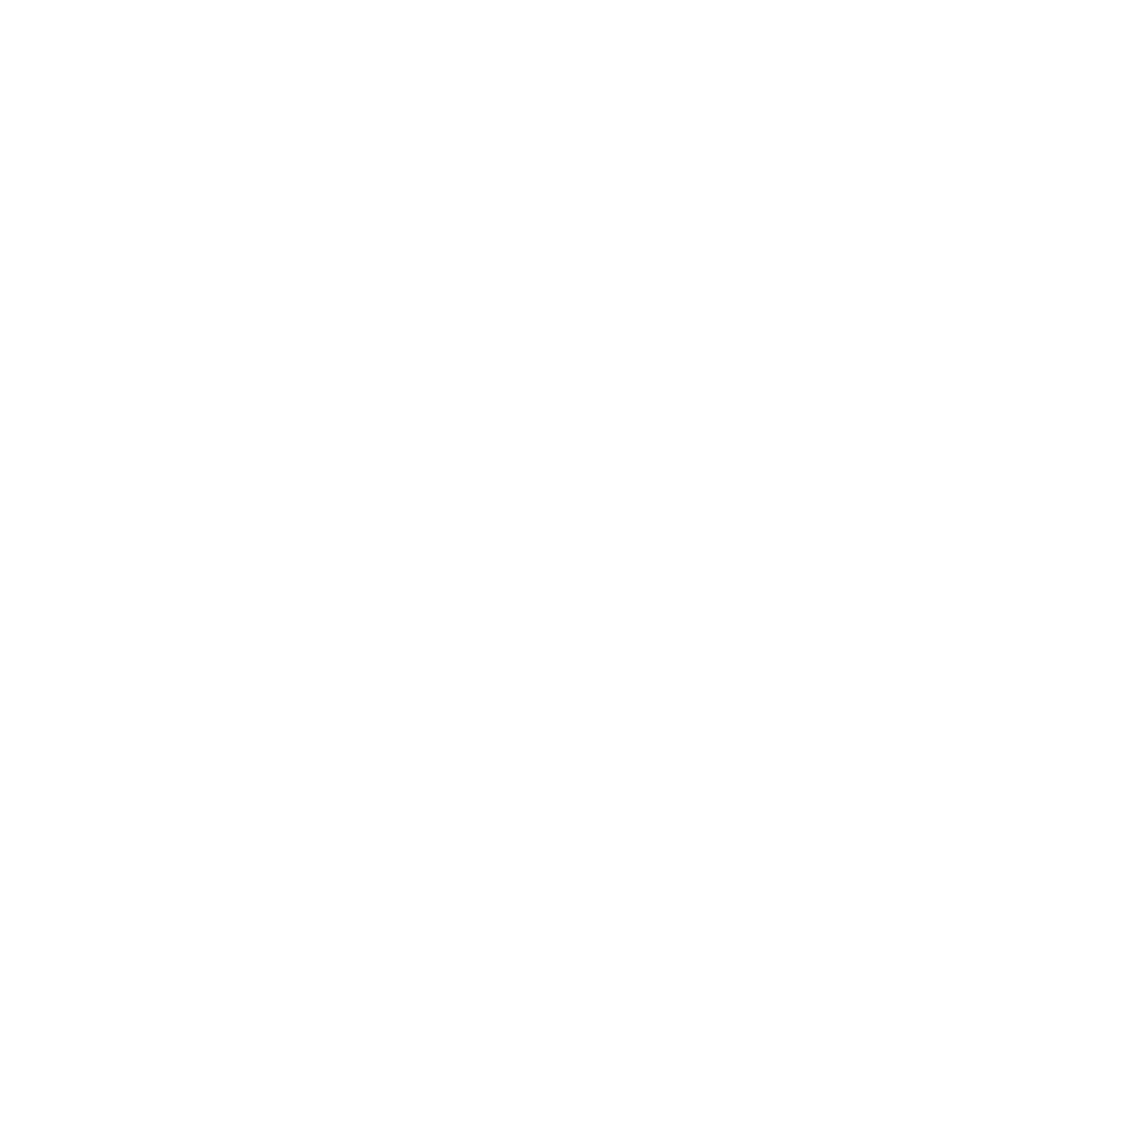

In [58]:
data=[quartiles_ram,quartiles_infu,quartiles_ceft,quartiles_capo]


red_diamond=dict(markerfacecolor='r',marker='D')

fig1, ax1=plt.subplots()
ax1.set_title('Tumors')
ax1.boxplot(data,flierprops=red_diamond,labels=["Ramicane","Infubinol","Capomulin","Ceftamin",],widths=.60,showfliers=True)
ax1.set_ylabel('Tumor Size (mm3)')
plt.show()
plt.figure(figsize=(10,10))
ax1.set_xlabel("Drug")
plt.savefig('tumor_box_plot.png')

Text(0, 0.5, 'Tumor Volume (mm3)')

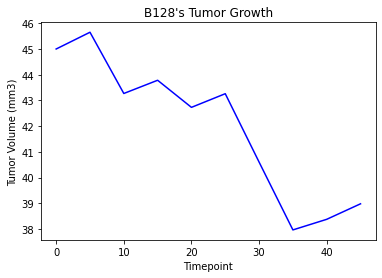

In [19]:
mouse_df=clinical_df.loc[clinical_df["Mouse ID"]=="b128"]
mouse_df
Tumor_Volume =mouse_df["Tumor Volume (mm3)"]
Timepoint=mouse_df["Timepoint"]
plt.plot(Timepoint,Tumor_Volume,color="blue",label="Tumor Volume over Time")

plt.title("B128's Tumor Growth")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


In [21]:
merged_capo.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [46]:


from matplotlib import pyplot as plt
from scipy.stats import linregress
from scipy import stats
import numpy as np
from sklearn import datasets
import pandas as pd



In [59]:
weight=merged_capo.iloc[:,7]
tumor=merged_capo.iloc[:,2]

# plt.scatter(weight,tumor)
# plt.xticks(weight,rotation=90)



In [38]:
slope, int, r, p, std_err = stats.linregress(weight, tumor)

fit = slope * weight + int



<IPython.core.display.Javascript object>


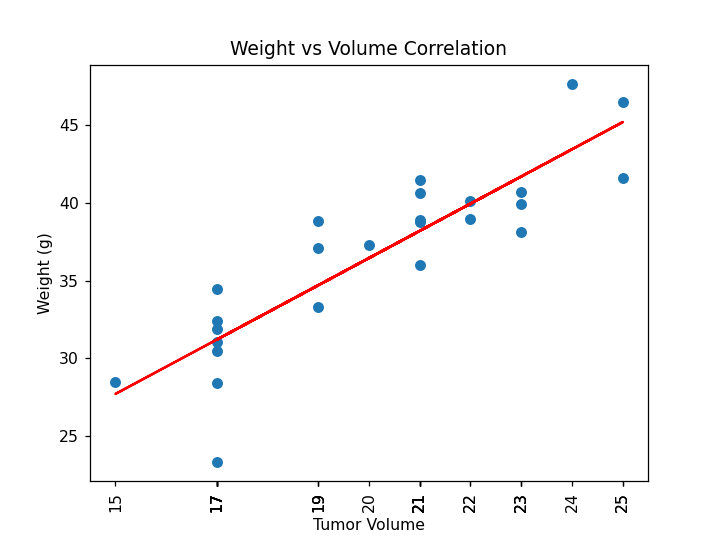

The correlation between weight and volume is 0.88


In [42]:
weight=merged_capo.iloc[:,7]
tumor=merged_capo.iloc[:,2]

plt.scatter(weight,tumor)
plt.plot(weight,fit,"r")
plt.xticks(weight,rotation=90)
plt.xlabel("Tumor Volume")
plt.ylabel("Weight (g)")
plt.title("Weight vs Volume Correlation")
plt.show()
plt.savefig('correlation.png')

print(f"The correlation between weight and volume is {round(correlation[0],2)}")